### Hessian and Jacobian Automatic matrix generation
I write the code to generate the Hessian and Jacobian Automatic matrices using sympy python library.

In [2]:
from sympy import *
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d


### The Hessian

For a general function $u(x_1,x_2,..., x_n) $  the Hessian is given by

\begin{equation*}
H = 
\begin{bmatrix}
\partial^2 f/\partial_{{x_1}{x_1}} f && \partial^2 f/\partial_{{x_1}{x_2}} f && ... && \partial^2 f/\partial_{{x_1}{x_n}} f \\
\\
\partial^2 f/\partial_{{x_2}{x_1}} f && \partial^2_f/\partial_{{x_2}{x_2}} f && ... && \partial^2_f/\partial_{{x_2}{x_n}} f
\\
\\
\partial^2 f/\partial_{{x_3}{x_1}} f && \partial^2_f/\partial_{{x_3}{x_2}} f && ... && \partial^2_f/\partial_{{x_3}{x_n}} f
\\
... && ... && ... && ...\\
\\
\partial^2 f/\partial_{{x_n}{x_1}} f && \partial^2_f/\partial_{{x_n}{x_2}} f && ... && \partial^2_f/\partial_{{x_n}{x_n}} f

\end{bmatrix}
\end{equation*}

### Example 1:
Generate the Hessian matrix for the function $u$

$ u(x_1, x_2, x_3) = 9 x_{1}^{2} x_{2}^{2} + x_{3} e^{x_{1}}$

In [3]:
x1 = Symbol('x_1')
x2 = Symbol('x_2')
x3 = Symbol('x_3')
u = 9*x1**2 * x2**2 + x3*exp(x1)
# initialize an array to store solution of sympy expressions
H_u = np.array([[x1, x2, x3], [x1, x2, x3], [x1, x2, x3]])
J_u = np.array([x1, x2, x3])
for i, x in zip(range(H_u.shape[0]), [x1, x2, x3]):
    J_u[i] = diff(u, x)
    for j, xx in zip(range(H_u.shape[0]), [x1, x2, x3]):
        H_u[i, j] = diff(J_u[i], xx)
# convert the numpy array of 2nd partial derivatives to a latex string
H_ltx = '$$ H = \\begin{bmatrix}\n'
for i in range(H_u.shape[0]):
    H_ltx += ' &\n '.join([latex(x) for x in H_u[i]])
    H_ltx += ' \\\\ \\\\ \n'
H_ltx += '\\end{bmatrix}\end{equation*}'
# convert the numpy array of first partial derivatives to a latex string
J_ltx = '\n\\begin{equation*} \n J = \\begin{bmatrix}\n'
J_ltx += ' &\n '.join([latex(x) for x in J_u])
J_ltx += ' \\\\ \\\\ \n'
J_ltx += '\\end{bmatrix}\n\end{equation*}'

# print solution in latex format

print("\\begin{equation*} \nu(x_1, x_2, x_3) = "+latex(u)+"\n \end{equation*}\n")
print(J_ltx)
print(H_ltx)
HTML(H_ltx)


\begin{equation*} 
u(x_1, x_2, x_3) = 9 x_{1}^{2} x_{2}^{2} + x_{3} e^{x_{1}}
 \end{equation*}


\begin{equation*} 
 J = \begin{bmatrix}
18 x_{1} x_{2}^{2} + x_{3} e^{x_{1}} &
 18 x_{1}^{2} x_{2} &
 e^{x_{1}} \\ \\ 
\end{bmatrix}
\end{equation*}
$$ H = \begin{bmatrix}
18 x_{2}^{2} + x_{3} e^{x_{1}} &
 36 x_{1} x_{2} &
 e^{x_{1}} \\ \\ 
36 x_{1} x_{2} &
 18 x_{1}^{2} &
 0 \\ \\ 
e^{x_{1}} &
 0 &
 0 \\ \\ 
\end{bmatrix}\end{equation*}


#### Solution 
For the equation u

\begin{equation*} 
u(x_1, x_2, x_3) = 9 x_{1}^{2} x_{2}^{2} + x_{3} e^{x_{1}}
 \end{equation*}

The Jacobian of the equation is:

\begin{equation*}
 J = \begin{bmatrix}
18 x_{1} x_{2}^{2} + x_{3} e^{x_{1}} &
 18 x_{1}^{2} x_{2} &
 e^{x_{1}} \\ \\ 
\end{bmatrix}
\end{equation*}

And the Hessian of the equation is:

\begin{equation*}
H = \begin{bmatrix}
18 x_{2}^{2} + x_{3} e^{x_{1}} &
 36 x_{1} x_{2} &
 e^{x_{1}} \\ \\ 
36 x_{1} x_{2} &
 18 x_{1}^{2} &
 0 \\ \\ 
e^{x_{1}} &
 0 &
 0 \\ \\ 
\end{bmatrix}
\end{equation*}


The power of the Hessian is:
1. if its determinant $|H|$ is positive, we know we are dealing with either a maximum or a minimum.
2. if $\partial^2 f/\partial_{{x_1}{x_1}}> 0$ the point is a minimum, whereas if $\partial^2 f/\partial_{{x_1}{x_1}}<0$ the point is a maximum.
3. when its determinant $|H|$ is negative, we know we are dealing with a saddle point. i.e. the point is neither a minimum or a maximum.

for the example above, we have
$\partial^2 f/\partial_{{x_1}{x_1}} = 18 x_{2}^{2} + x_{3} e^{x_{1}}$

##### Create random matrix values for $x2$ with a uniform distribution.

In [12]:
samples = 20000
minV = -100000
maxV = 1000
# df = pd.DataFrame(np.random.uniform(minV,maxV,(samples,1)), columns=['x2'])
# linear
df = pd.DataFrame(np.linspace(minV,maxV,samples), columns=['x2'])

#### Calculate the value $u$ 
 substitute the generated values for $x1, x2$ and $x3$ into the first term equation of the Hessian matrix:  $$\partial^2 f/\partial_{{x_1}{x_1}} = 18 x_{2}^{2} + x_{3} e^{x_{1}}$$

for the purpose of plotting, we need to express one of the variables in terms of the other variables.
i.e 
$$
x_1 = \log_e\frac{-18x_2^2}{x_3}
$$

In [13]:
f = lambdify (args =[x2,x3],expr= log(-18*x2**2/x3))
f(2,-3)

3.1780538303479458

### Generate values for $x_3$ where the expression inside the $log$ is positive.


In [14]:
df['x3'] = np.random.uniform(minV,-1e-12,(samples,1))
df['x2'] = df.apply(lambda row: row['x2'] if row['x2']!=0 else np.random.uniform(1e-10,maxV), axis=1)

In [15]:
# apply the function
df ['x1'] = df.apply(lambda row: f(row['x2'], row['x3']), axis=1)

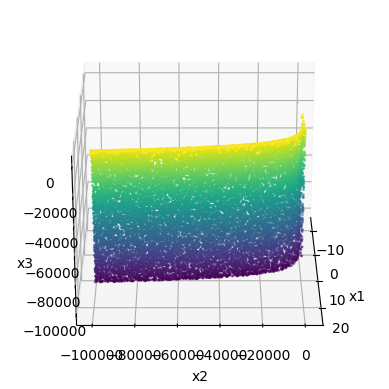

In [16]:
from IPython.display import HTML
from matplotlib import animation
fig = plt.figure();
ax = plt.axes(projection='3d');


ax.scatter3D(xs=df['x1'],
             ys=df['x2'],
             zs=df['x3'],
             s=1,
             c=df['x3']);
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('x3');
# ax.set_axis_off()

def animate(frame):
    ax.view_init(25, frame/4)
    # plt.pause(.001)
    return fig;


anim = animation.FuncAnimation(fig, animate, frames=500, interval=10);
# Writer = animation.FFMpegWriter(fps=50, codec='libx264');  # Or
Writer = animation.FFMpegWriter(fps=50, metadata=dict(artist='Me'), bitrate=1800)
anim.save('file.mp4', writer=Writer);
# plt.show()
# anim = animation.FuncAnimation(fig,animate, frames=100, interval=450)
# anim.save('file.mp4')
HTML("""
    <video width="320" height="240" autoplay loop muted>
      <source src="file.mp4" type="video/mp4" />
      Your browser does not support the video tag.
    </video>
""")
